<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/AVH_Car_Rental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
#Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [6]:
# Read the Training Data
train_data = pd.read_csv("/content/drive/MyDrive/AV_Car_rental/train_E1GspfA.csv")

In [7]:
train_data.shape

(18247, 3)

In [8]:
train_data.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [11]:
train_data.isnull().sum()

date      0
hour      0
demand    0
dtype: int64

In [12]:
train_data.corr()

,hour,demand
hour,1.000000,0.161498
demand,0.161498,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


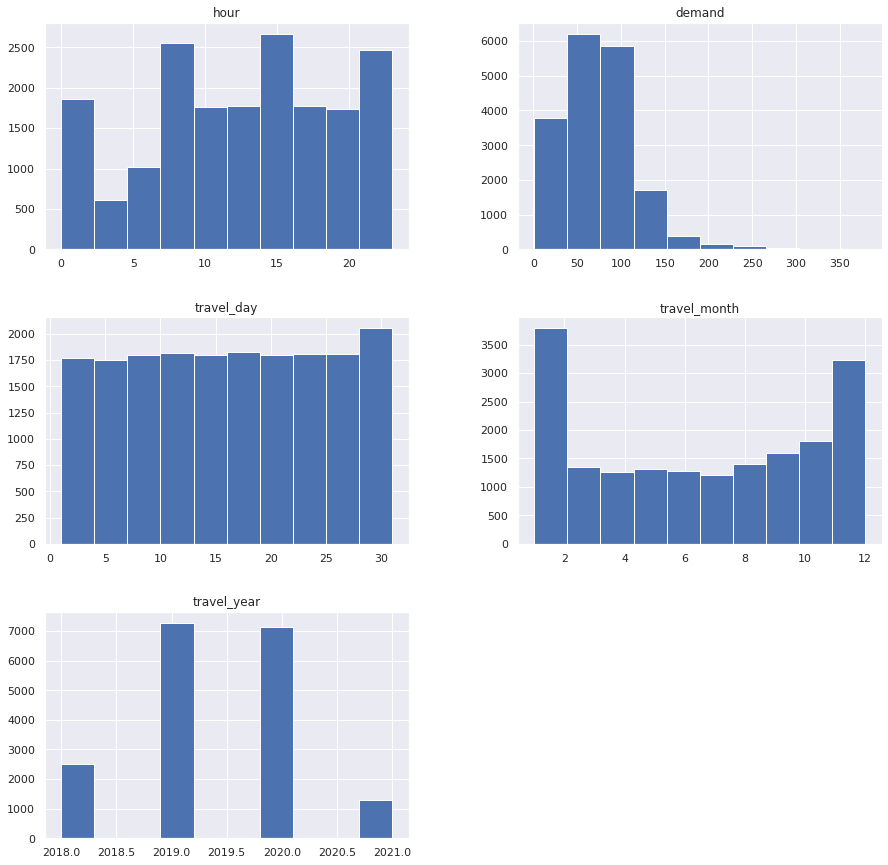

In [41]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = train_data.hist(ax=ax)

In [18]:
''' Since it is string value, we extract date alone from the existing column
by creating the new column '''

train_data["travel_day"] = pd.to_datetime(train_data.date, format="%Y-%m-%d").dt.day

In [19]:
''' Since it is string value, we extract month alone from the existing column
by creating the new column '''

train_data["travel_month"] = pd.to_datetime(train_data.date, format="%Y-%m-%d").dt.month

In [20]:
''' Since it is string value, we extract year alone from the existing column
by creating the new column '''

train_data["travel_year"] = pd.to_datetime(train_data.date, format="%Y-%m-%d").dt.year

In [21]:
# Since we have converted date column into integers, Now we can drop as it is of no use.

train_data.drop(["date"], axis = 1, inplace = True)

In [22]:
train_data.head()

,hour,demand,travel_day,travel_month,travel_year
0,9,91,18,8,2018
1,10,21,18,8,2018
2,13,23,18,8,2018
3,14,104,18,8,2018
4,15,81,18,8,2018


In [26]:
###Splitting X and Y
X = train_data.loc[:, ['hour','travel_day','travel_month','travel_year']]
Y = train_data['demand']

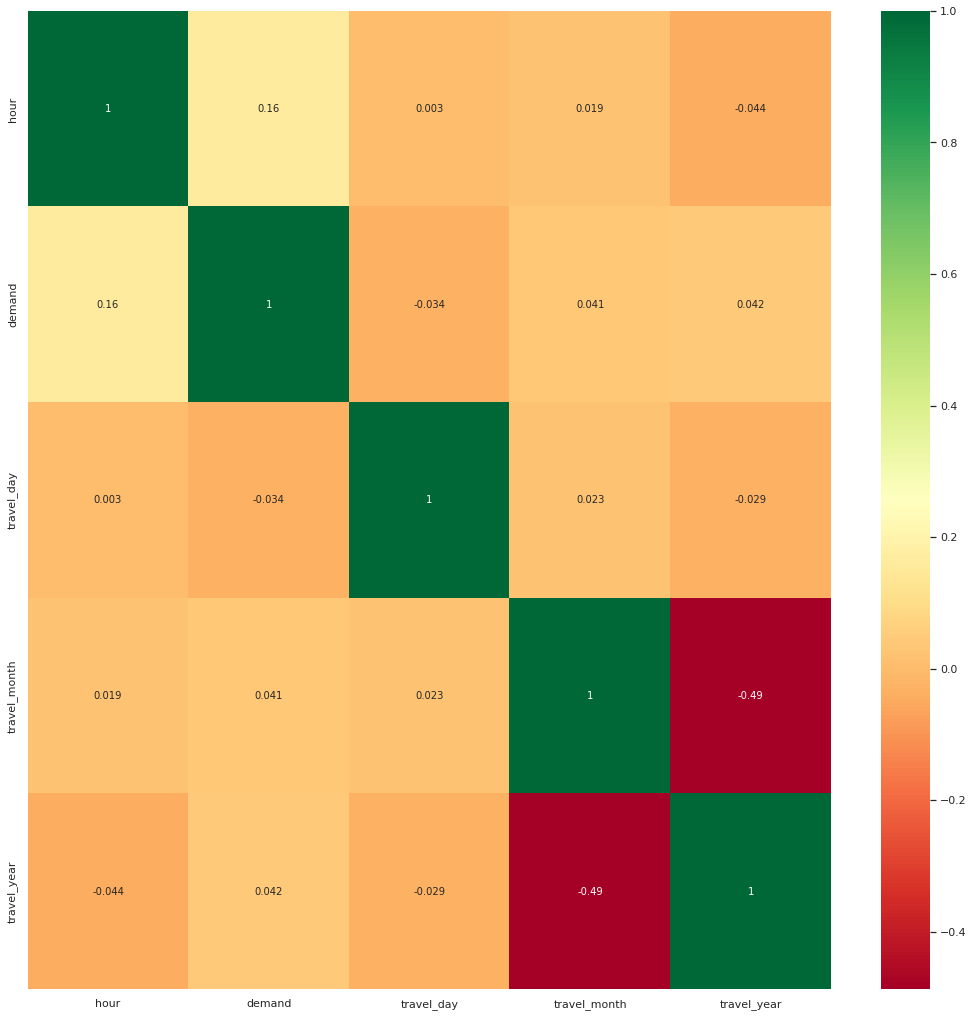

In [27]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [28]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

ExtraTreesRegressor()

In [29]:
print(selection.feature_importances_)

[0.21482061 0.53525763 0.19399276 0.05592899]


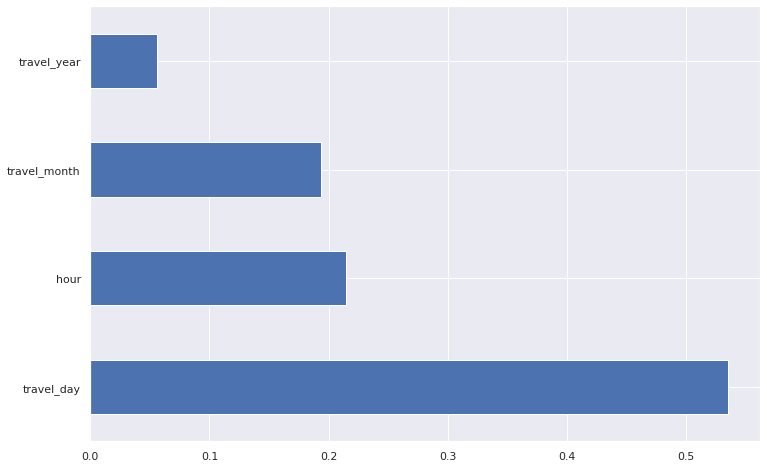

In [30]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [31]:
###Splitting X and Y. Ignoring Least Important Column
X = train_data.loc[:, ['hour','travel_day','travel_month']]
Y = train_data['demand']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [34]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(13685, 3)
(4562, 3)
(13685,)
(4562,)


In [35]:
#Try with Linear Regression

from sklearn.linear_model import LinearRegression
Linear_Reg = LinearRegression()
Linear_Reg.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred_lr = Linear_Reg.predict(x_test)

In [36]:
from sklearn import metrics

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

MAE: 31.334730169640945
MSE: 1633.4086199473297
RMSE: 40.41545026283055


In [67]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion = "mse", max_depth = 8)
dt.fit(x_train,y_train)
y_pred_dt= dt.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

MAE: 29.36702081834379
MSE: 1291.3483046400784
RMSE: 35.93533504282489


In [50]:
dt_test_rmse =[]
for i in range(1, 11):
    dt_para = DecisionTreeRegressor(max_depth=i)
    dt_para.fit(x_train,y_train)
    y_pred_dt_para = dt_para.predict(x_test)
    dt_test_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt_para)))
print(dt_test_rmse)

[39.59376270344841, 38.55865559266443, 37.712654141128546, 37.18812360099417, 36.57467264697709, 35.98439577973397, 36.03154370095306, 35.93533504282489, 36.44263542129587, 37.40044626327374]


Text(0.5, 1.0, 'Decision Tree Regressor scores for different depth values')

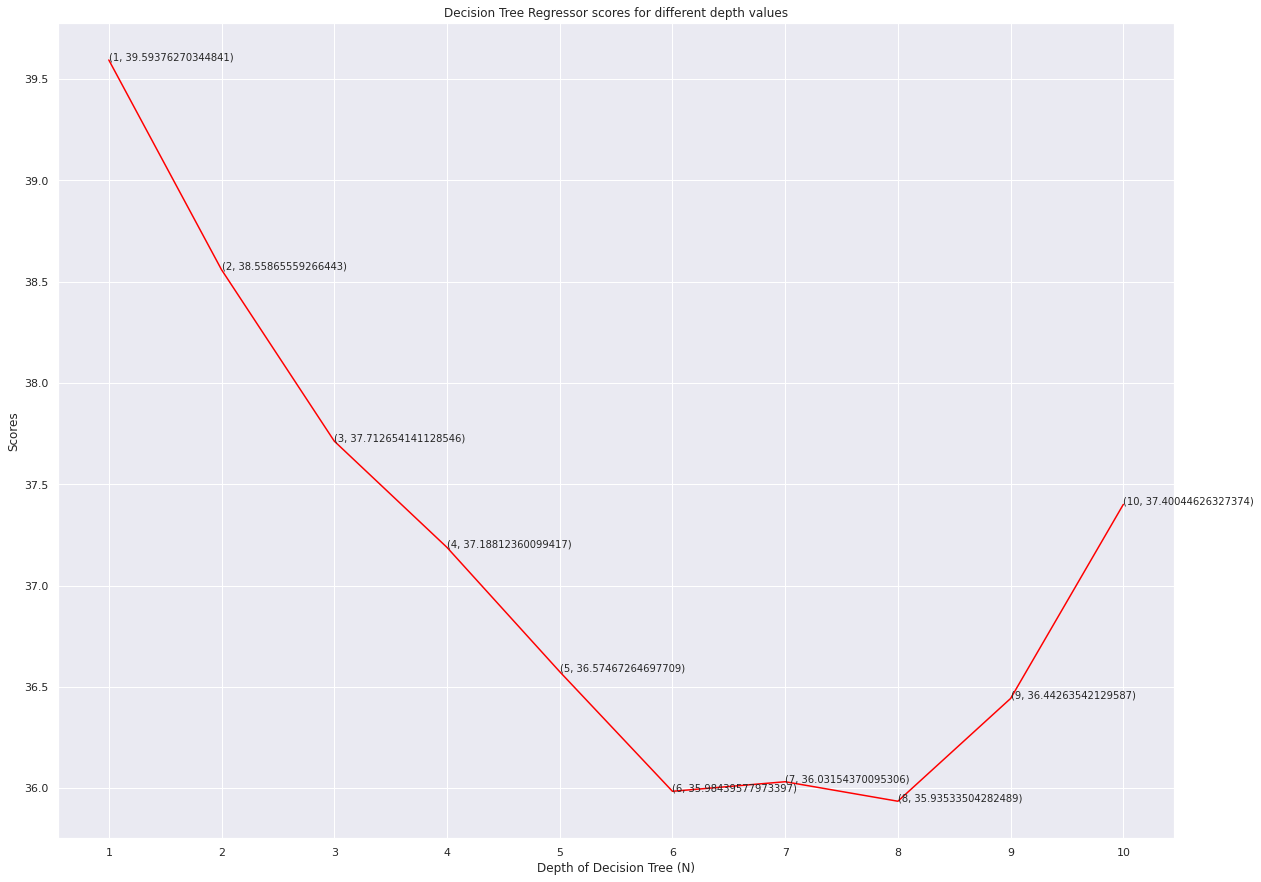

In [51]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], dt_test_rmse, color = 'red')
for i in range(1,11):
    plt.text(i, dt_test_rmse[i-1], (i, dt_test_rmse[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Regressor scores for different depth values')

Decision Tree regressor rmse with max_depth=8 is: 35.93533504


In [69]:
dt.tree_.node_count

505

In [70]:
dt.tree_.max_depth

8

Bagging

In [56]:
from sklearn.ensemble import BaggingRegressor

base_estimator = dt, max_samples = 0.5

In [58]:
bag = BaggingRegressor(base_estimator = dt)
bag.fit(x_train,y_train)
Y_pred_bag = bag.predict(x_test)

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred_bag))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred_bag))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_bag)))

MAE: 33.09122406978282
MSE: 1751.042042704282
RMSE: 41.84545426571783


In [60]:
bag_rmse = []
ms = np.arange(0.1,1,0.1)
for i in ms:
    bag = BaggingRegressor(base_estimator = dt, max_samples = i)
    bag.fit(x_train,y_train)
    Y_pred_bag = bag.predict(x_test)
    bag_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_bag)))
print(bag_rmse)

[37.39763802925368, 37.38551021502778, 38.22177219715533, 38.8655748895515, 39.447487938259066, 39.94540838708874, 40.45893080529697, 40.906990200015194, 41.456348231031996]


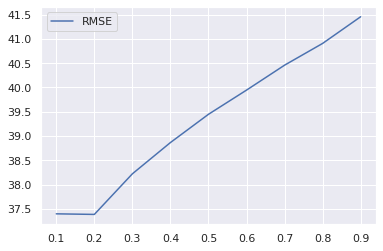

In [76]:
# Plotting the results of Random_Forest
plt.plot(ms,bag_rmse,label = "RMSE")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


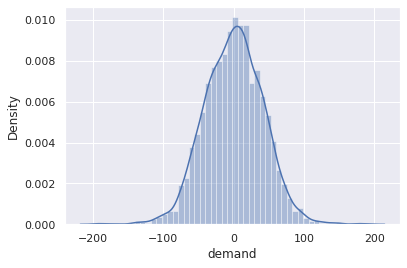

In [79]:
sns.distplot(y_test-Y_pred_bag)
plt.show()

In [53]:
from sklearn.model_selection import cross_val_score

In [42]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
y_pred_rf = reg_rf.predict(x_test)

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

MAE: 32.803991132461
MSE: 1710.497643146365
RMSE: 41.35816295662036


In [45]:
reg_rf.score(x_train, y_train)

0.6283273172666333

In [71]:
rf_score = []
mf = np.arange(0.1,1,0.1)
for i in mf:
    RF = RandomForestRegressor(max_features = i, n_estimators = 30)
    RF.fit(x_train,y_train)
    Y_pred_rf = RF.predict(x_test)
    rf_score.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_rf)))    
print(rf_score)

[41.552860599610426, 41.38202598517943, 41.4535959694172, 41.304091688476205, 41.31316298964219, 41.46366917752812, 41.58235023081392, 41.454887224476614, 41.54768003302893]


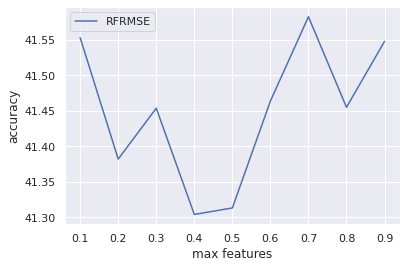

In [73]:
plt.plot(mf,rf_score,label = "RFRMSE")
plt.ylabel("accuracy")
plt.xlabel("max features")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


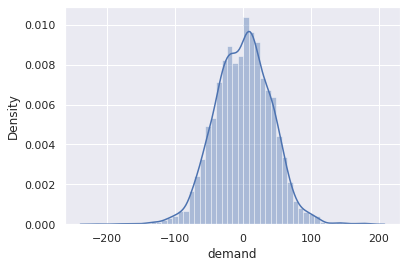

In [77]:
sns.distplot(y_test-y_pred_rf)
plt.show()